In [94]:
import pandas as pd
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_data(symbol):
    data = pd.read_csv('data/{}.csv'.format(symbol))
    data['date'] = data['date'].apply(lambda x: str(x))
    data.set_index('date', inplace=True)
    data.sort_index(ascending=True, inplace=True)
    data.index = pd.to_datetime(data.index)
    return data

df = get_data('159915.SZ')
df

,open,close,high,low,volume,symbol
date,,,,,,
2011-12-09,0.795,0.797,0.814,0.795,1061772,159915.SZ
2011-12-12,0.790,0.790,0.803,0.790,311065,159915.SZ
2011-12-13,0.788,0.768,0.788,0.763,967444,159915.SZ
2011-12-14,0.768,0.760,0.777,0.755,816095,159915.SZ
2011-12-15,0.755,0.752,0.764,0.747,417005,159915.SZ
...,...,...,...,...,...,...
2024-05-22,1.819,1.820,1.825,1.816,763988,159915.SZ
2024-05-23,1.837,1.811,1.837,1.807,6599889,159915.SZ
2024-05-24,1.804,1.781,1.821,1.778,6828319,159915.SZ


In [95]:
factor = df['close'].pct_change(20)
factor

date
2011-12-09         NaN
2011-12-12         NaN
2011-12-13         NaN
2011-12-14         NaN
2011-12-15         NaN
                ...   
2024-05-22    0.067449
2024-05-23    0.063417
2024-05-24    0.044575
2024-05-27    0.029668
2024-05-28    0.039627
Name: close, Length: 3025, dtype: float64

In [96]:
factor2 = df['close']/df['close'].shift(20)-1
factor2

date
2011-12-09         NaN
2011-12-12         NaN
2011-12-13         NaN
2011-12-14         NaN
2011-12-15         NaN
                ...   
2024-05-22    0.067449
2024-05-23    0.063417
2024-05-24    0.044575
2024-05-27    0.029668
2024-05-28    0.039627
Name: close, Length: 3025, dtype: float64

In [97]:
import numpy as np

signal = np.where(factor>0.08,1,np.nan)
signal = np.where(factor<0,0,signal)
signal = pd.Series(signal,df.index)
signal = signal.ffill()
signal = signal.fillna(0)
signal

date
2011-12-09    0.0
2011-12-12    0.0
2011-12-13    0.0
2011-12-14    0.0
2011-12-15    0.0
             ... 
2024-05-22    0.0
2024-05-23    0.0
2024-05-24    0.0
2024-05-27    0.0
2024-05-28    0.0
Length: 3025, dtype: float64

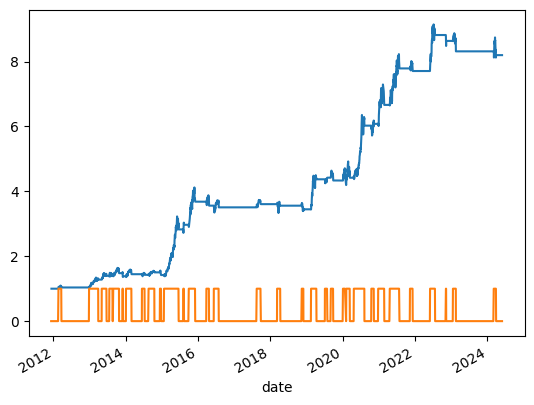

In [98]:
import matplotlib.pyplot as plt
signal.plot()
plt.show()

In [99]:
daily_returns = df['close'].pct_change()
strategy_returns = signal.shift(1) * daily_returns
# 计算累积收益
portfolio_value = (1 + strategy_returns).cumprod()
portfolio_value

date
2011-12-09         NaN
2011-12-12    1.000000
2011-12-13    1.000000
2011-12-14    1.000000
2011-12-15    1.000000
                ...   
2024-05-22    8.196599
2024-05-23    8.196599
2024-05-24    8.196599
2024-05-27    8.196599
2024-05-28    8.196599
Length: 3025, dtype: float64

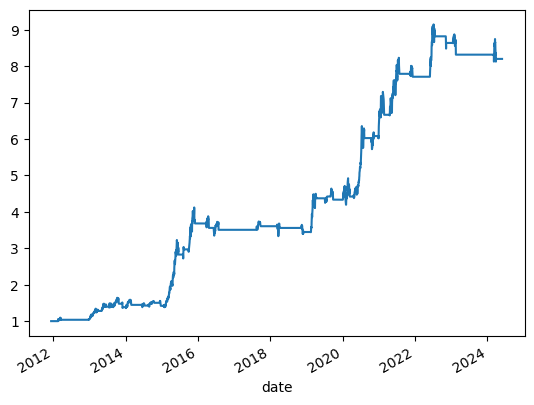

In [100]:
import matplotlib.pyplot as plt
portfolio_value.plot()
plt.show()

In [101]:
print('策略总收益',portfolio_value[-1]-1)

策略总收益 7.196599352013246


In [102]:
cagr = (portfolio_value[-1]-1) ** (252 / len(df)) - 1
print('年化收益',round(cagr*100,1),'%')

年化收益 17.9 %
